# Exercício de Programação: Gradiente Descendente

Neste notebook, você implementará e explorará os algoritmos de Gradiente Descendente em Lote (Batch) e Estocástico (Stochastic) para treinar um modelo de Regressão Linear.

## Parte 1: Gerar Dados Sintéticos

Aqui você pode aproveitar a geração de dados sintéticos que utilizou no exercício anterior (Regressão Linear).

In [27]:
import numpy as np
import matplotlib.pyplot as plt

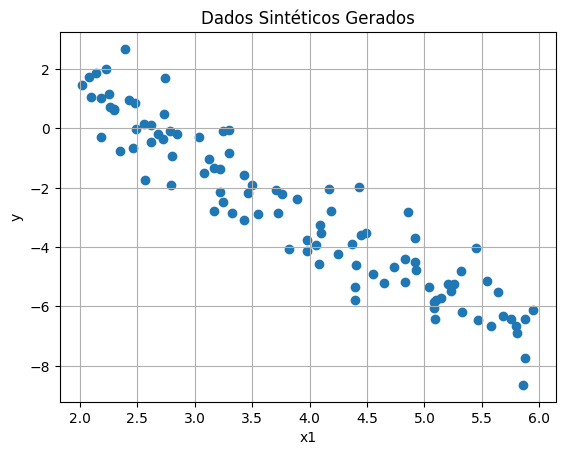

In [28]:
# Para garantir que seja possível reproduzir os resultados
np.random.seed(42)

# Gere 100 instâncias
m = 100

# ############################################################### #
X = 2 + 4 * np.random.rand(m, 1)
ruido = np.random.randn(m, 1)
y = 5 - 2 * X + ruido


# ############################################################### #

# Vamos plotar os dados para visualizá-los
plt.scatter(X, y)
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Dados Sintéticos Gerados")
plt.grid(True)
plt.show()

## Parte 2: Gradiente Descendente em Lote (Batch GD)

O Gradiente Descendente em Lote calcula os gradientes com base em todo o conjunto de treinamento a cada passo. A fórmula para o vetor de gradiente da função de custo MSE é:

$$ \nabla_{\theta} \text{MSE}(\theta) = \frac{2}{m} X^T (X\theta - y) $$

E o passo de atualização dos pesos é:

$$ \theta^{(\text{próximo passo})} = \theta - \eta \nabla_{\theta} \text{MSE}(\theta) $$

**Sua tarefa:** Adicione o termo de viés e implemente o Batch GD.

In [29]:
eta = 0.05
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # inicialização aleatória

m = len(X)
X_b = np.c_[np.ones((m, 1)), X]  # adiciona o termo de viés

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

print(f"Theta final (solução): {theta.ravel()}")


Theta final (solução): [21.35344567 -5.96750236]


### Explorando a Taxa de Aprendizagem (eta)

Agora, vamos observar como os parâmetros `theta` mudam após 200 iterações com diferentes taxas de aprendizagem. Isso nos ajuda a entender a importância desse hiperparâmetro. O que podemos concluir?

In [30]:
learning_rates = [0.01, 0.05, 0.10]

m = len(X)
X_b = np.c_[np.ones((m, 1)), X]  # adiciona o termo de viés

for eta in learning_rates:
    np.random.seed(42)
    theta = np.random.randn(2, 1)
    for iteration in range(200):
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        
    print(f"Para eta = {eta}, theta após 200 iterações: {theta.ravel()}")


Para eta = 0.01, theta após 200 iterações: [ 1.7314504  -1.23520356]
Para eta = 0.05, theta após 200 iterações: [ 4.42960373 -1.87439894]
Para eta = 0.1, theta após 200 iterações: [1.03483014e+78 4.36819555e+78]


## Parte 3: Gradiente Descendente Estocástico (Stochastic GD)

O Gradiente Descendente Estocástico acelera o processo calculando os gradientes com base em uma única instância aleatória a cada passo. Devido à sua natureza aleatória, é comum usar um **agendamento de aprendizagem** para diminuir gradualmente a taxa de aprendizagem.

Neste exercício, usaremos a função de agendamento: `learning_rate = 5 / (t + 500)`, onde `t` é o número da iteração.

**Sua tarefa:** Complete o código abaixo para implementar o Stochastic GD. Compare com o resultado do Batch GD. Note que executamos apenas 100 épocas.

In [31]:
n_epochs = 100
t0, t1 = 5, 500  # hiperparâmetros do agendamento de aprendizagem

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta_solution_sgd = np.random.randn(2, 1)  # inicialização aleatória

m = len(X)
X_b = np.c_[np.ones((m, 1)), X]  # adiciona o termo de viés

t = 0  # contador de iterações

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta_solution_sgd - yi)
        eta = learning_schedule(t)
        theta_solution_sgd = theta_solution_sgd - eta * gradients
        t += 1

print(f"Theta final (solução): {theta_solution_sgd.ravel()}")


Theta final (solução): [ 4.9710209  -2.00493894]


## Parte 4: Stochastic GD com Scikit-Learn

O Scikit-Learn oferece a classe `SGDRegressor`, que implementa o Gradiente Descendente Estocástico para regressão.

**Sua tarefa:** Use a classe `SGDRegressor` para treinar um modelo nos mesmos dados sintéticos. Em seguida, imprima o intercepto (`intercept_`) e o coeficiente (`coef_`) encontrados. Use 0.05 para a taxa de aprendizagem inicial (eta0), 100 épocas e random_state=42.

In [32]:
from sklearn.linear_model import SGDRegressor

# ############################################################### #
sgd_reg = SGDRegressor(max_iter=100, eta0=0.05, random_state=42, learning_rate="constant")
# ############################################################### #

# O método fit espera um array 1D para y, por isso usamos .ravel()
sgd_reg.fit(X, y.ravel())

print(f"Intercepto do Scikit-learn (solução): {sgd_reg.intercept_}")
print(f"Coeficiente do Scikit-learn (solução): {sgd_reg.coef_}")


Intercepto do Scikit-learn (solução): [5.45017526]
Coeficiente do Scikit-learn (solução): [-2.22372277]


### Conclusão

Compare os valores de `theta` que você encontrou com a implementação manual (tanto Batch quanto Stochastic) e com a implementação do Scikit-Learn. Eles devem ser muito próximos!

Os parâmetros da função original eram intercepto = 5 e coeficiente = -2. Nossos resultados devem estar próximos a esses valores, com pequenas variações devido ao ruído que adicionamos aos dados.